In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

# LOAD DATASET

In [2]:
import pandas as pd

df = pd.read_csv("./list-ecommerce-for-delivery-and-review-prediction.csv")

In [3]:
display(df)

,order_id,product_id,seller_id,customer_unique_id,delivery_delay_hours,seller_state,customer_state,review_score,price,freight_value,seller_grade,product_category_name_english,product_description_lenght,product_photos_qty,time_to_ship_hours,purchase_count,avg_review_score,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,7c396fd4830fd04220f754e42b4e5bff,-170.579722,SP,SP,4,29.99,8.72,Mediocre,housewares,268.0,4.0,56.974167,53,4.415094,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,af07308b275d755c9edb36a90c618231,-128.537500,SP,BA,4,118.70,22.76,Mediocre,perfumery,178.0,1.0,41.823056,110,4.579365,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,3a653a41f6f9fc3d2a113cf8398680e8,-413.891944,SP,GO,5,159.90,19.22,Mediocre,auto,232.0,1.0,5.186389,1124,4.122822,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,7c142cf63193a1473d2e66489a9ae977,-311.521667,MG,RN,5,45.00,27.20,Mediocre,pet_shop,468.0,3.0,90.198056,150,4.451613,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,72632f0f9dd73dfee390c9b22eb56dd6,-221.716111,SP,SP,5,19.90,8.72,Mediocre,stationery,316.0,4.0,22.465278,124,3.923977,2018-02-13 21:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108444,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,da62f9e57a76d978d02ab5362c509660,-30.367778,SP,SP,4,174.90,20.10,Mediocre,baby,828.0,4.0,34.395556,77,4.089744,2018-02-06 12:58:58
108445,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,737520a9aad80b3fbbdad19b66b37b30,-132.595278,SP,BA,5,205.99,65.02,Mediocre,home_appliances_2,500.0,2.0,30.095278,69,4.246377,2017-08-27 14:46:43
108446,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,5097a5312c8b157bb7be58ae360ef43c,-480.451667,MG,RJ,2,179.99,40.59,Mediocre,computers_accessories,1893.0,1.0,90.110000,715,4.189048,2018-01-08 21:28:27
108447,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,5097a5312c8b157bb7be58ae360ef43c,-480.451667,MG,RJ,2,179.99,40.59,Mediocre,computers_accessories,1893.0,1.0,90.110000,715,4.189048,2018-01-08 21:28:27


# DUPLIKASI DATA

In [4]:
exact_duplicate_count = df.duplicated(keep='first').sum()
print("Jumlah Data yang duplikas:", exact_duplicate_count)

exact_duplicate_rows = df[df.duplicated(keep='first')]
display(exact_duplicate_rows)

Jumlah Data yang duplikas: 10155


,order_id,product_id,seller_id,customer_unique_id,delivery_delay_hours,seller_state,customer_state,review_score,price,freight_value,seller_grade,product_category_name_english,product_description_lenght,product_photos_qty,time_to_ship_hours,purchase_count,avg_review_score,order_purchase_timestamp
10,e6ce16cb79ec1d90b1da9085a6118aeb,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,f2a85dec752b8517b5e58a06ff3cd937,-204.691389,ES,RJ,1,99.00,30.53,Mediocre,garden_tools,450.0,1.0,39.991667,197,3.902542,2017-05-16 19:41:10
52,9faeb9b2746b9d7526aef5acb08e2aa0,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,c77154776ead8e798c2d684205938f71,-361.551389,SP,RS,1,60.00,15.52,Mediocre,sports_leisure,1153.0,2.0,21.400278,219,4.211207,2018-07-26 14:39:59
58,66e4624ae69e7dc89bd50222b59f581f,b37b72d5a56f887725c2862184b8cab8,db4350fd57ae30082dec7acbaacc17f9,ddf60e20e6e262e2136801ce5cd628b0,37.479444,SP,SE,1,22.99,22.85,Mediocre,telephony,566.0,1.0,129.684444,136,4.124138,2018-03-09 14:50:15
68,f271576bed568e896f99eb710cd3a6f8,d457916b4fdc60154ed93b5dd3e6fd69,76d64c4aca3a7baf218bf93ef7fa768d,6a0e43f0d7e1b5539e4c58a26ebe35da,-651.558056,PR,BA,3,329.90,82.48,Mediocre,construction_tools_construction,424.0,1.0,72.187500,64,4.128571,2018-01-07 21:44:54
71,68e48e68da1f50f7c5838ea75e3a20dd,a659cb33082b851fb87a33af8f0fff29,817245bcc3badd82bbd222e0366951a6,a464f750556546a0989d9326ec003ccf,-482.685833,SP,SP,5,84.90,13.25,Mediocre,auto,380.0,1.0,23.876944,28,4.073171,2018-06-18 16:02:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108372,dbd4cbb492a12b99c5224014930acc18,d34efb58e1930773fcde9b951892b1b1,febab0275244b9a49a623f0bd613ca2f,888af42530e7523201a4326273a7b35c,-350.205278,SP,SP,4,37.40,16.30,Mediocre,housewares,1533.0,1.0,25.533333,109,4.263566,2017-03-26 14:12:46
108394,83db27f85506380229913b0dfdf5cd18,86f2416d4670e4ea3ca5494d043d9f24,7c67e1448b00f6e969d365cea6b010ab,35a382f91046bec8ef1acb7dc62b7318,-511.318056,SP,RJ,5,149.94,49.15,Bad,office_furniture,1205.0,1.0,332.267222,976,3.348208,2018-04-18 12:35:58
108402,b3112ca67f3afd4e20cf2ee91fc4f804,4f18ca9862f511ecba98258b2194d061,5b0cc932433fa5184b5b94bfe6bcc256,f690f0caffab80b6f849f08ba1692925,120.057222,SP,SP,2,95.00,24.75,Bad,furniture_bedroom,252.0,1.0,306.918333,12,3.470588,2018-08-02 22:46:54
108421,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,fb9310710003399b031add3e55f34719,-176.391944,SP,SP,4,356.00,18.12,Mediocre,sports_leisure,1105.0,1.0,187.362222,386,4.142857,2017-08-10 21:21:07


In [5]:
df_cleaned = df.drop_duplicates(keep='first')
print("Number of rows after removing duplicates:", len(df_cleaned))

Number of rows after removing duplicates: 98294


# CEK MISSING VALUES

In [6]:
print("Null values per column:")
print(df_cleaned.isnull().sum())

Null values per column:
order_id                         0
product_id                       0
seller_id                        0
customer_unique_id               0
delivery_delay_hours             0
seller_state                     0
customer_state                   0
review_score                     0
price                            0
freight_value                    0
seller_grade                     0
product_category_name_english    0
product_description_lenght       0
product_photos_qty               0
time_to_ship_hours               0
purchase_count                   0
avg_review_score                 0
order_purchase_timestamp         0
dtype: int64


# **1. ANALISASI EDA**

### **A. analisis pengaruh ketepatan waktu dengan rating**

In [7]:
bins = [-float('inf'), -24, 0, 24, 168, float('inf')]
labels = ['Early', 'On-Time', 'Slight Delay', 'Moderate Delay', 'Significant Delay']
df_cleaned.loc[:, 'delivery_delay_range'] = pd.cut(df_cleaned['delivery_delay_hours'], bins=bins, labels=labels, right=False)

print("Value counts for 'delivery_delay_range':")
print(df_cleaned['delivery_delay_range'].value_counts())

Value counts for 'delivery_delay_range':
delivery_delay_range
Early                89107
Significant Delay     3262
Moderate Delay        3151
On-Time               1475
Slight Delay          1299
Name: count, dtype: int64


In [8]:
average_review_scores_by_delay = df_cleaned.groupby('delivery_delay_range', observed=True)['review_score'].mean()
display(average_review_scores_by_delay)

delivery_delay_range
Early                4.261438
On-Time              4.145763
Slight Delay         4.021555
Moderate Delay       2.821961
Significant Delay    1.736052
Name: review_score, dtype: float64

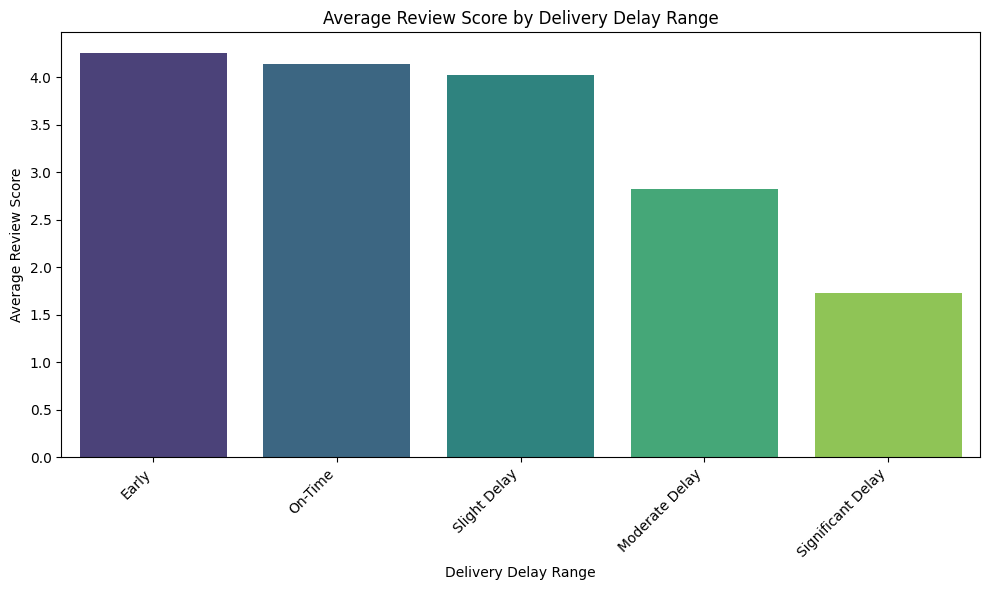

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Use a good colormap for the bars, e.g., 'viridis'
colors = sns.color_palette("viridis", n_colors=len(average_review_scores_by_delay))
sns.barplot(
    x=average_review_scores_by_delay.index,
    y=average_review_scores_by_delay.values,
    palette=colors
)
plt.title('Average Review Score by Delivery Delay Range')
plt.xlabel('Delivery Delay Range')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Penyebaran data numerik dan kategorical**

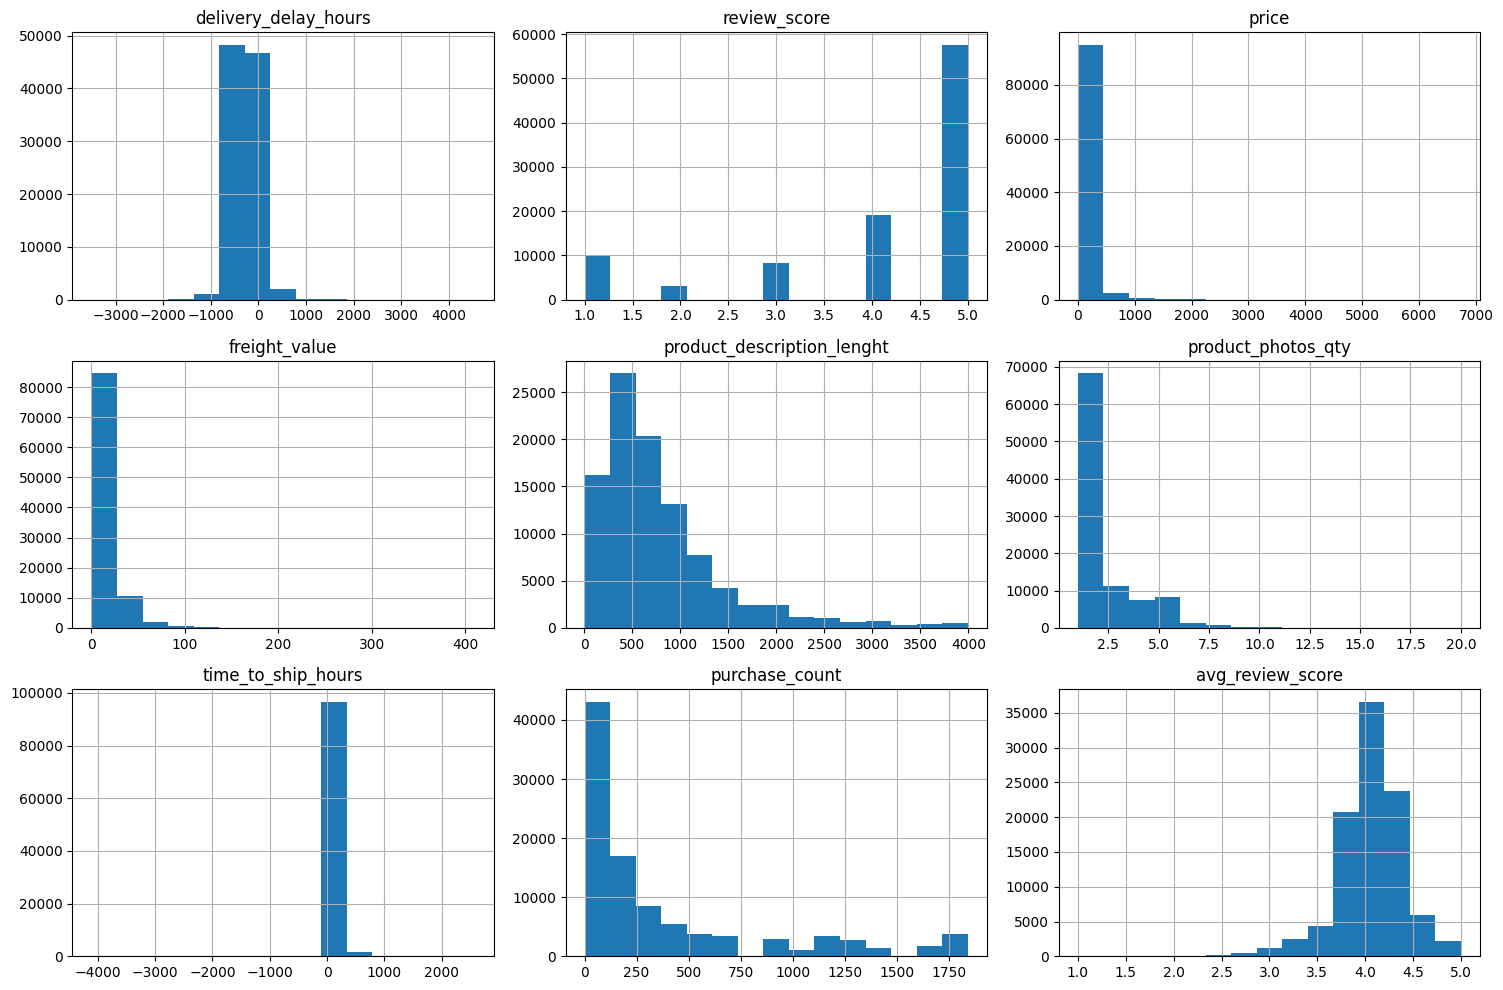

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numerical data distribution
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

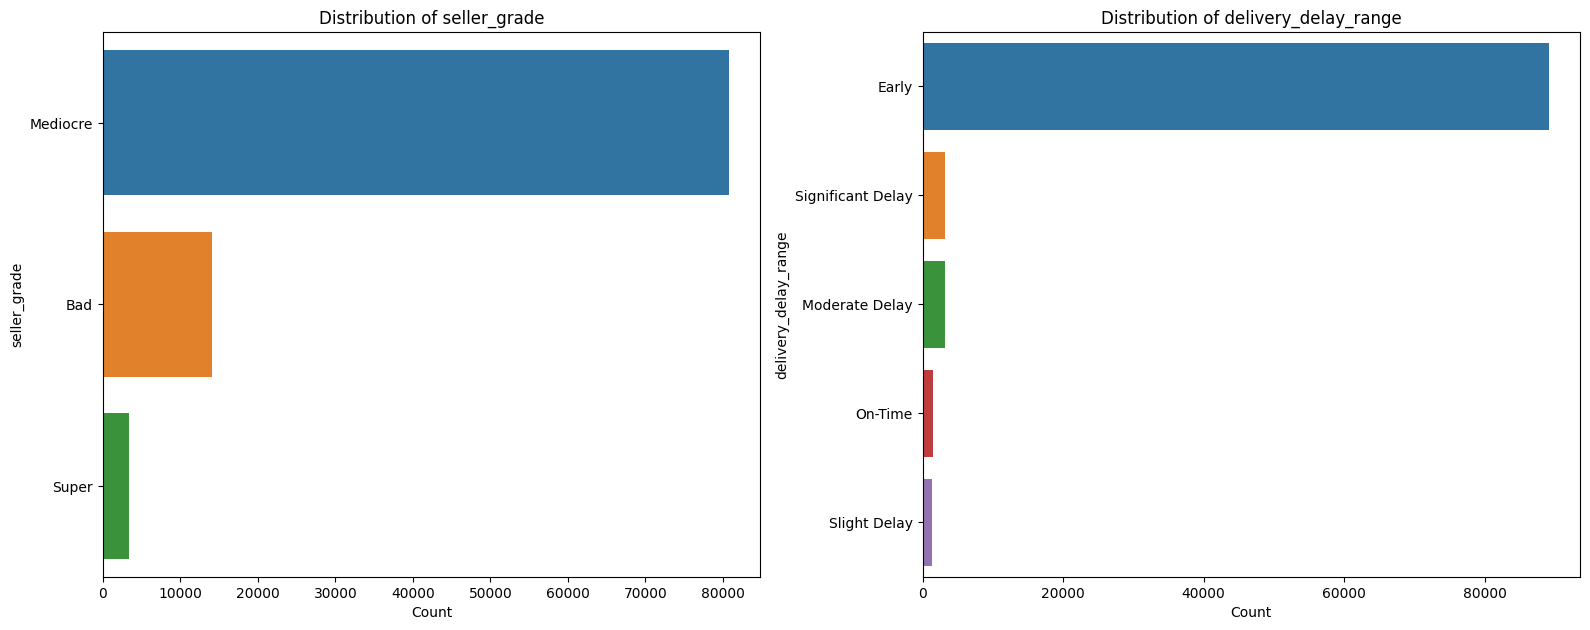

In [11]:
# Visualize categorical data distribution in a 2x2 grid
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
filtered_categorical_cols = [col for col in categorical_cols if df_cleaned[col].nunique() < 20]

n_plots = min(4, len(filtered_categorical_cols))
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(filtered_categorical_cols[:4]):
    sns.countplot(data=df_cleaned, y=col, order=df_cleaned[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(n_plots, 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **C.Distribus data target**

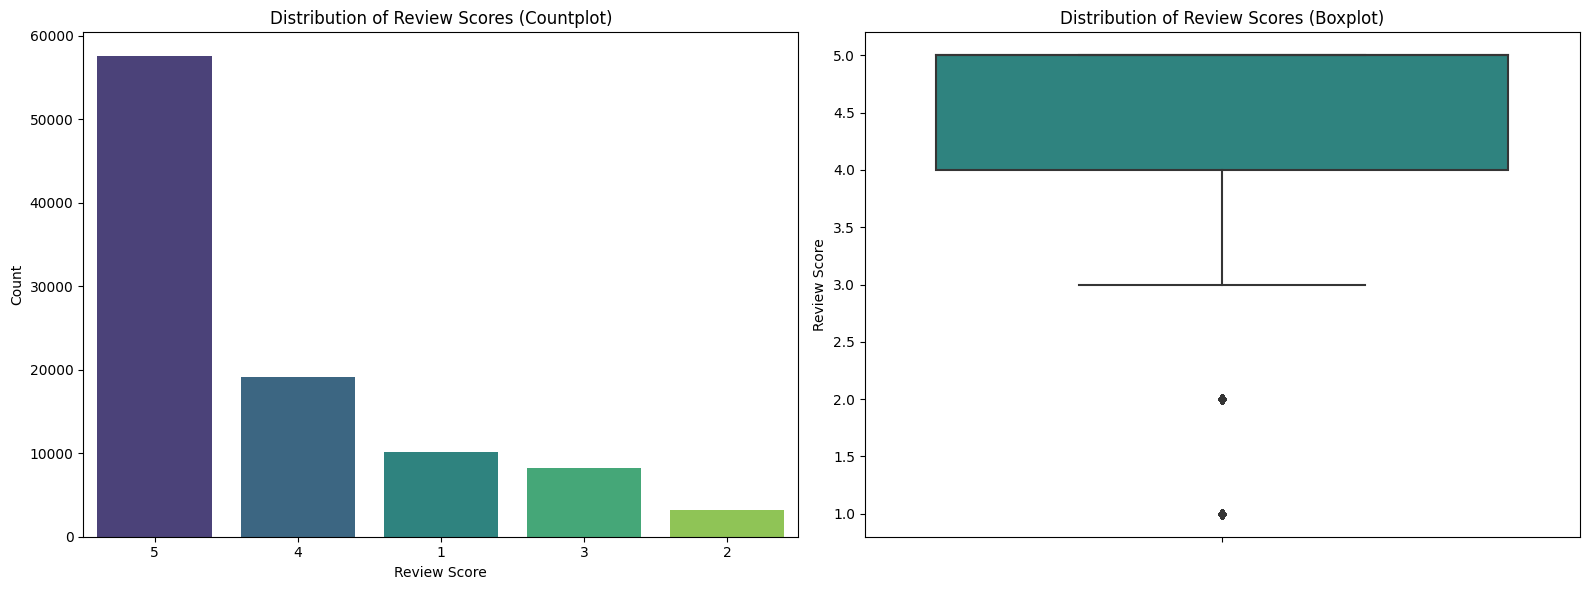

In [12]:
# Create a 1-row, 2-column subplot for review score distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Countplot for review score distribution
sns.countplot(
    data=df_cleaned,
    x='review_score',
    order=df_cleaned['review_score'].value_counts().index,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Distribution of Review Scores (Countplot)')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Count')

# Boxplot for review score distribution
sns.boxplot(
    data=df_cleaned,
    y='review_score',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Distribution of Review Scores (Boxplot)')
axes[1].set_ylabel('Review Score')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()

### Distribusi Kolom Numerik

In [13]:
numeric_cols = [
    'delivery_delay_hours', 'price', 'freight_value',
    'product_description_lenght', 'product_photos_qty',
    'time_to_ship_hours', 'purchase_count', 'avg_review_score'
]

# Statistik deskriptif
descriptive_stats = df[numeric_cols].describe().T
descriptive_stats["mode"] = df[numeric_cols].mode().iloc[0]
print(descriptive_stats)


                               count        mean         std          min  \
delivery_delay_hours        108449.0 -273.167892  242.091773 -3504.386944   
price                       108449.0  119.791783  180.491351     0.850000   
freight_value               108449.0   19.967151   15.700173     0.000000   
product_description_lenght  108449.0  786.347112  650.816261     4.000000   
product_photos_qty          108449.0    2.207969    1.719895     1.000000   
time_to_ship_hours          108449.0   78.587116   86.622575 -4109.098056   
purchase_count              108449.0  377.020009  490.328610     1.000000   
avg_review_score            108449.0    4.045760    0.370936     1.000000   

                                   25%         50%         75%          max  \
delivery_delay_hours       -391.941944 -289.457222 -156.294444  4535.401944   
price                        39.900000   74.900000  134.000000  6735.000000   
freight_value                13.080000   16.280000   21.150000   409.

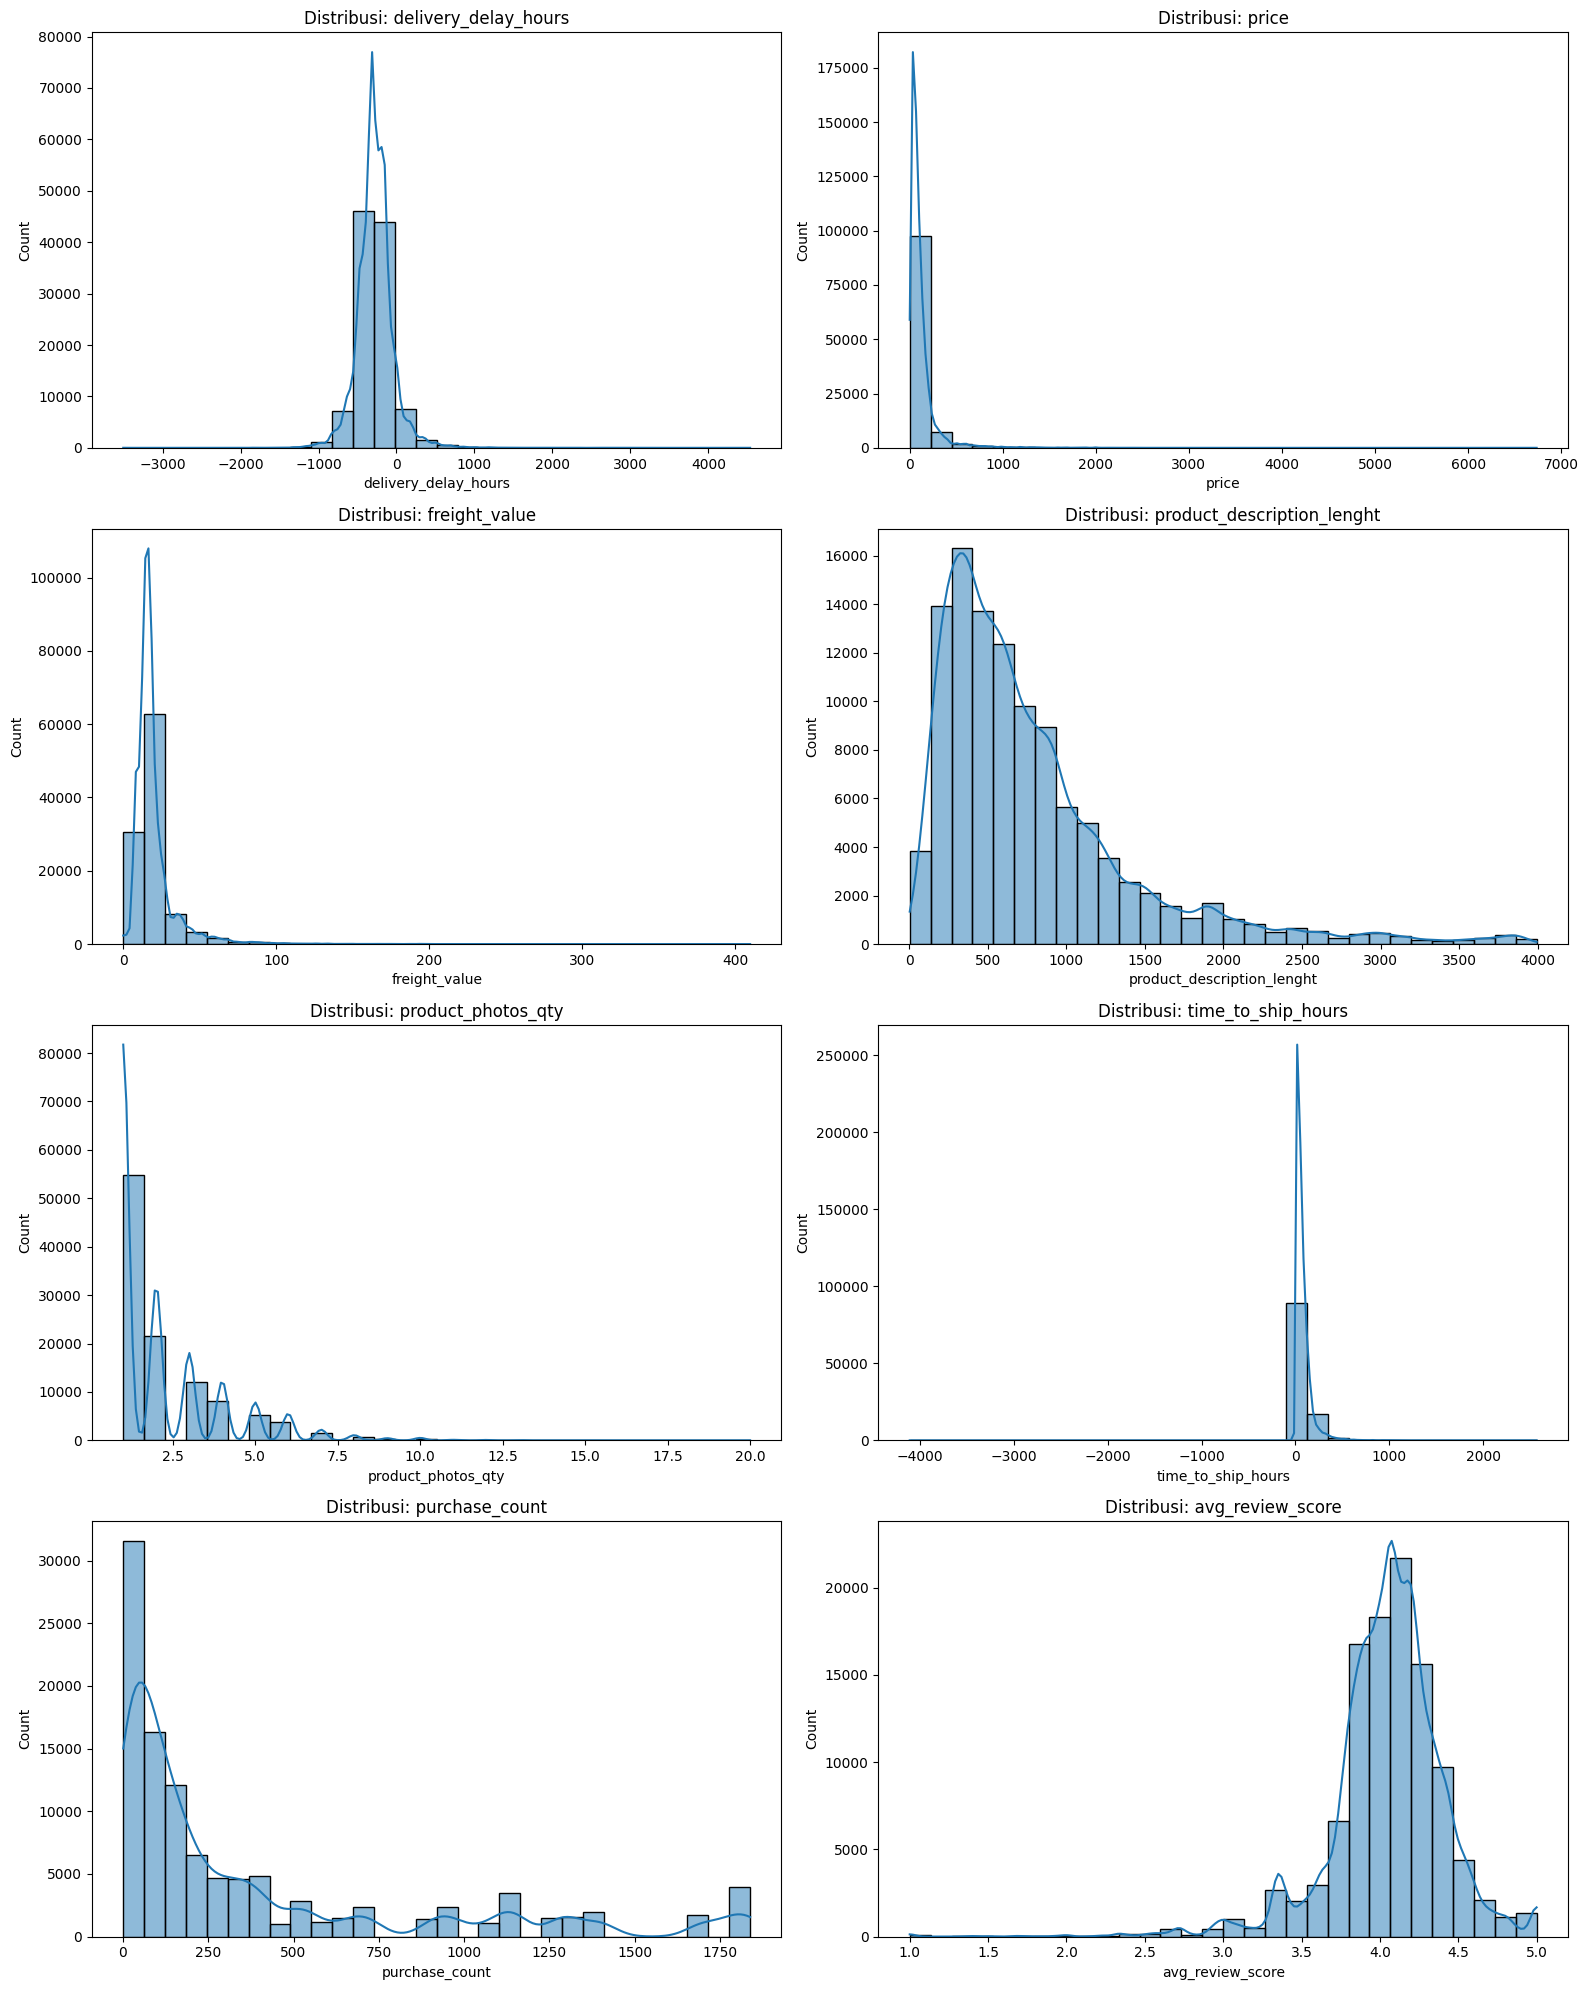

In [14]:
plt.figure(figsize=(16, 20))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi: {col}')

plt.tight_layout()
plt.show()


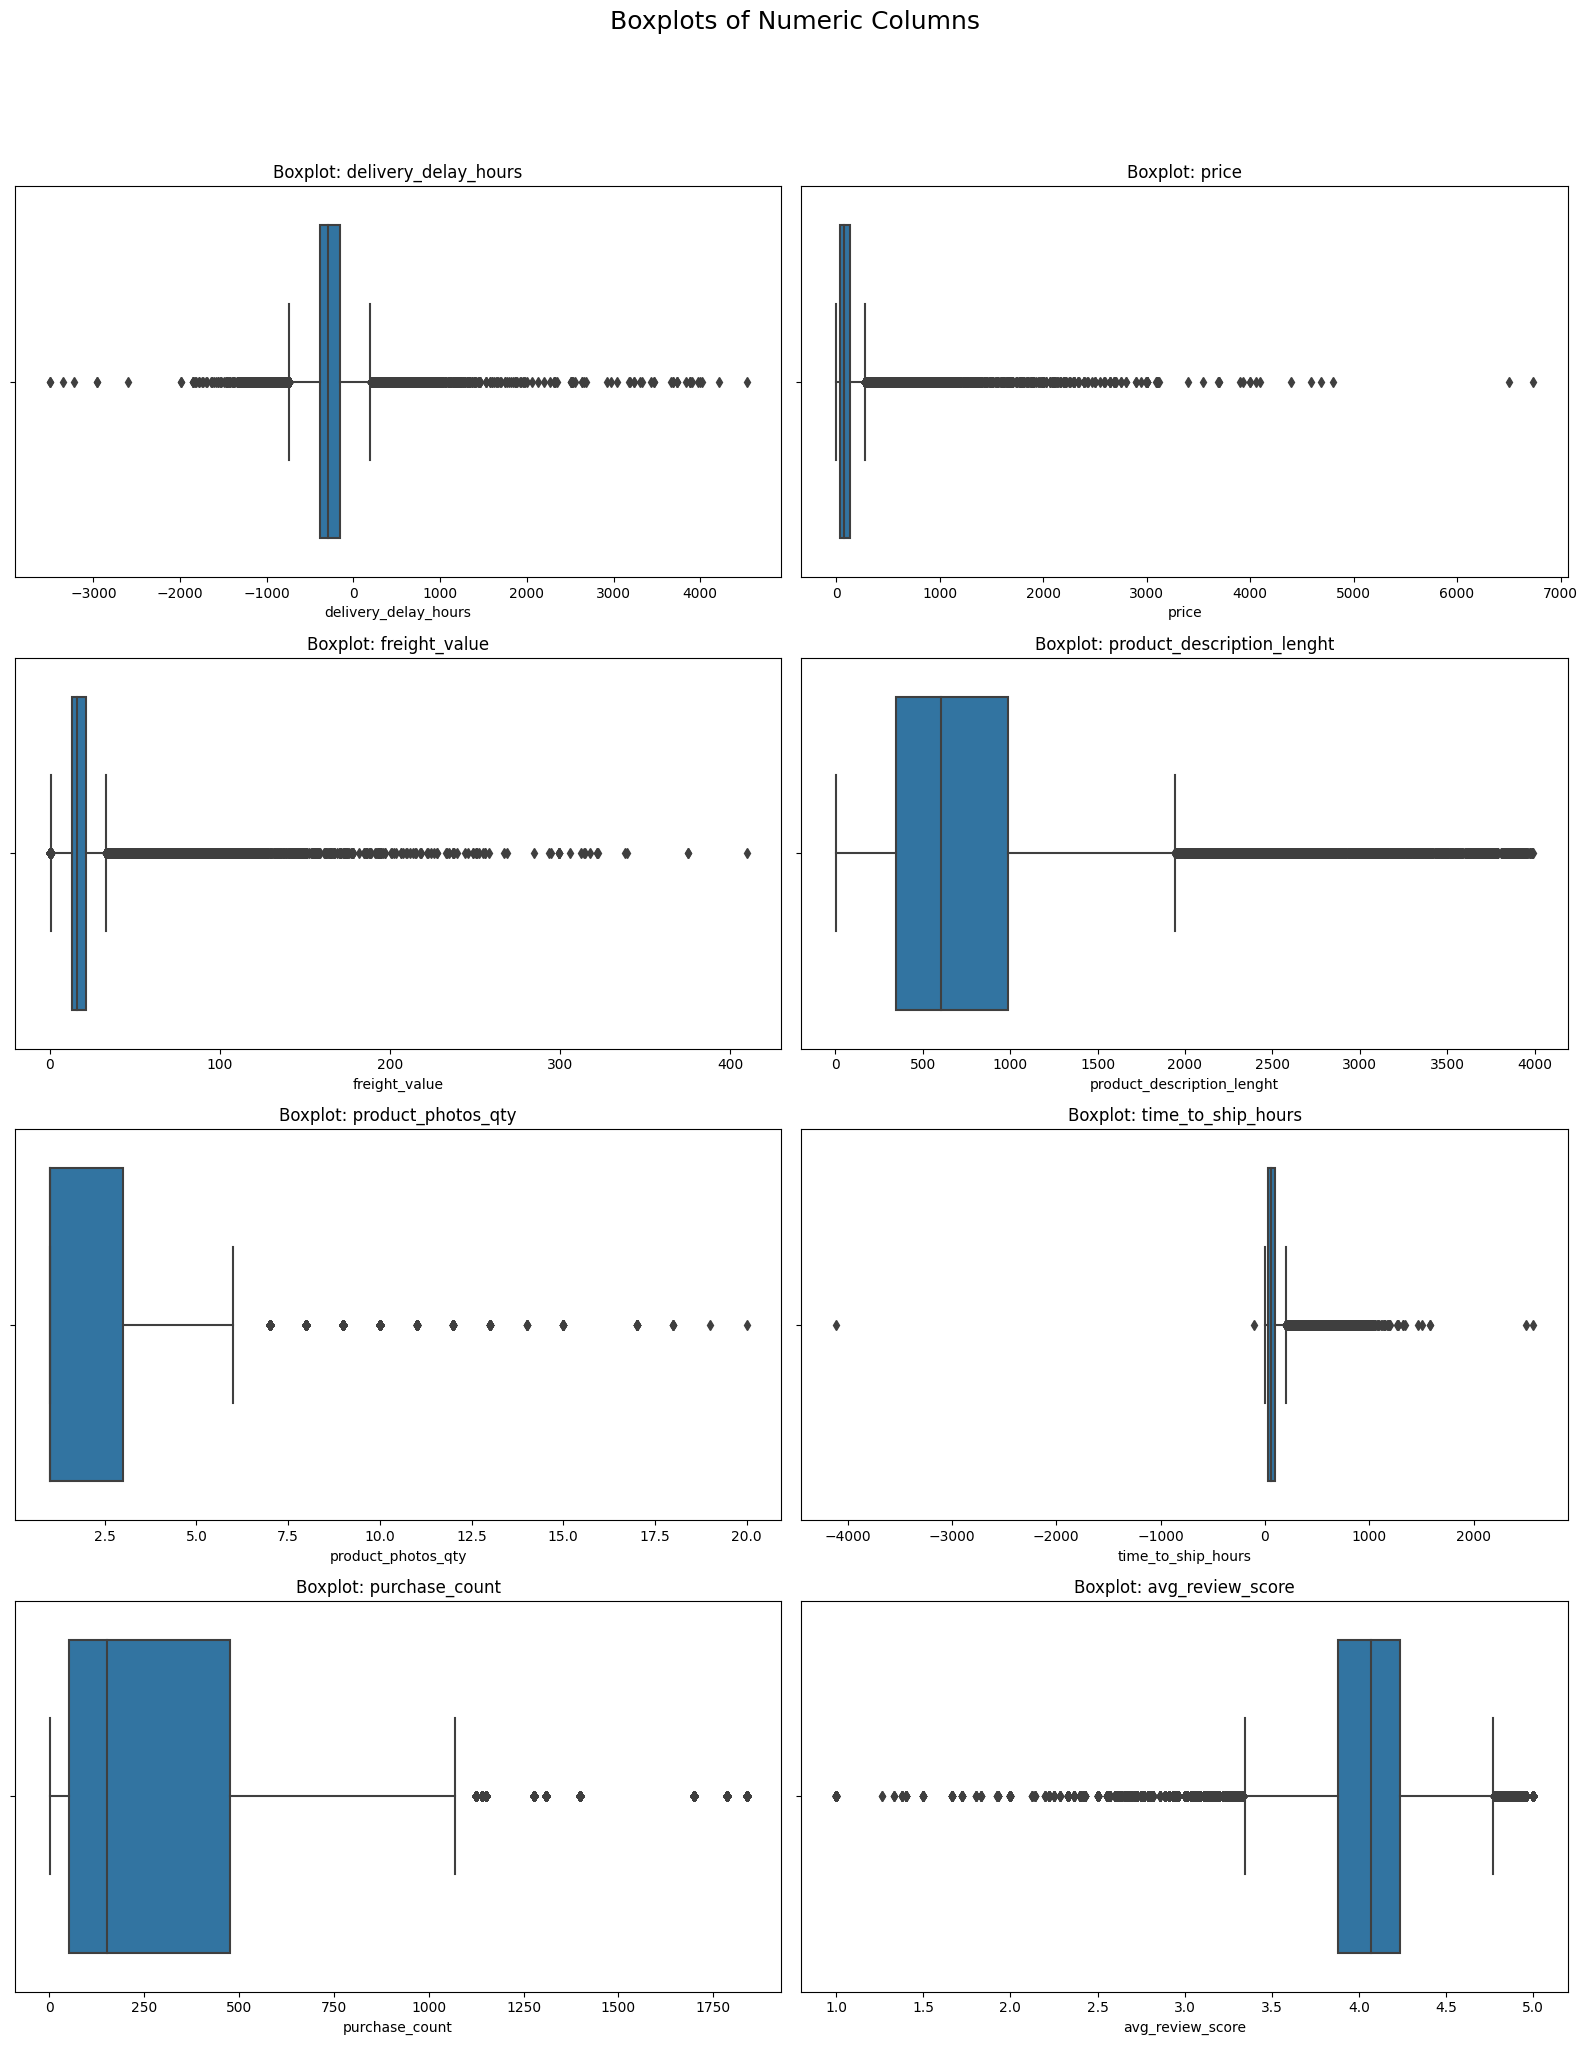

In [15]:
plt.figure(figsize=(16, 20))
plt.suptitle('Boxplots of Numeric Columns', fontsize=18, y=1.02)
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### **Visualisasi keterkaitan harga barang dan biaya ongkir dengan rating**

**Reasoning**:
Create scatter plots to visualize the relationship between price and review score, and freight value and review score.



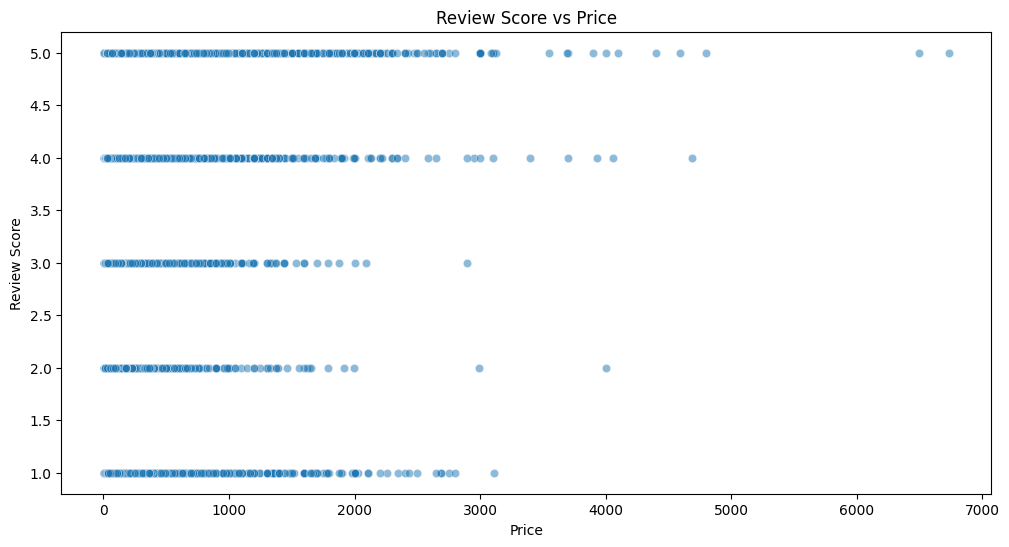

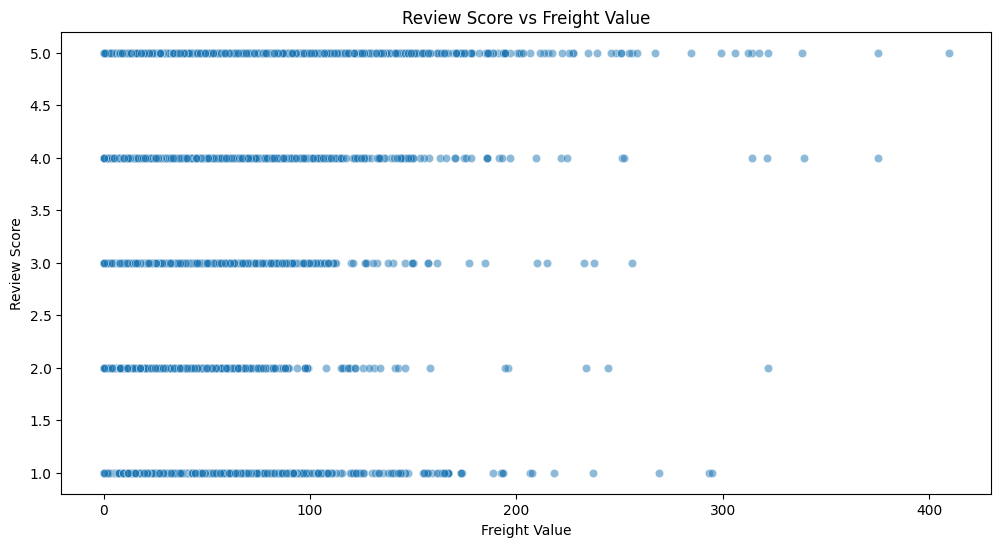

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='price', y='review_score', alpha=0.5)
plt.title('Review Score vs Price')
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='freight_value', y='review_score', alpha=0.5)
plt.title('Review Score vs Freight Value')
plt.xlabel('Freight Value')
plt.ylabel('Review Score')
plt.show()

In [17]:
price_bins = [0, 50, 100, 200, 500, 1000, float('inf')]
price_labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '>1000']
df_cleaned['price_range'] = pd.cut(df_cleaned['price'], bins=price_bins, labels=price_labels, right=False)

freight_bins = [0, 10, 20, 30, 50, float('inf')]
freight_labels = ['0-10', '11-20', '21-30', '31-50', '>50']
df_cleaned['freight_range'] = pd.cut(df_cleaned['freight_value'], bins=freight_bins, labels=freight_labels, right=False)

average_review_scores_by_price = df_cleaned.groupby('price_range')['review_score'].mean()
display(average_review_scores_by_price)

average_review_scores_by_freight = df_cleaned.groupby('freight_range')['review_score'].mean()
display(average_review_scores_by_freight)

price_range
0-50        4.131730
51-100      4.102422
101-200     4.151506
201-500     4.122309
501-1000    4.133577
>1000       4.081818
Name: review_score, dtype: float64

freight_range
0-10     4.215270
11-20    4.145160
21-30    4.072587
31-50    4.003117
>50      4.010427
Name: review_score, dtype: float64

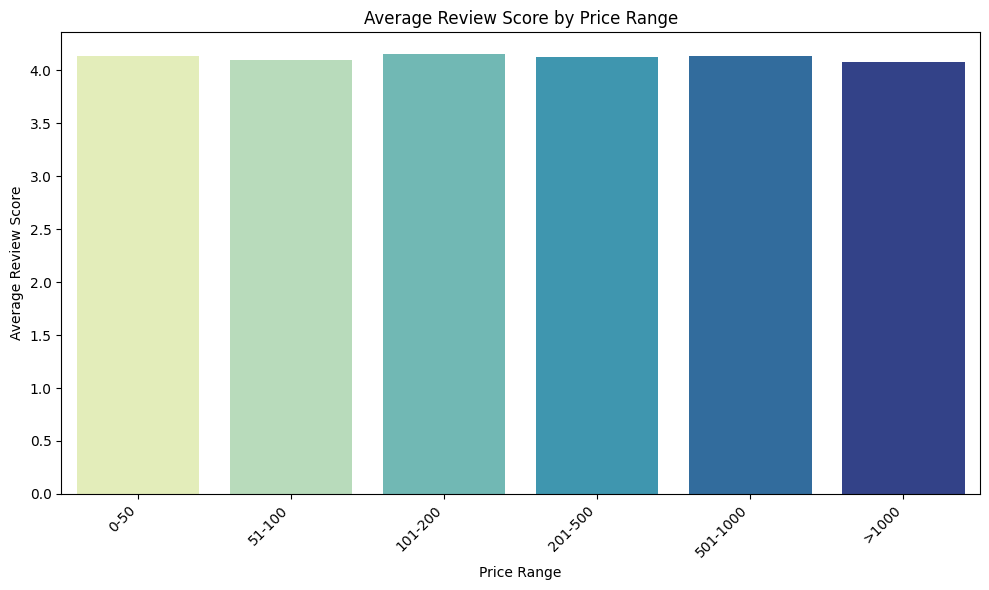

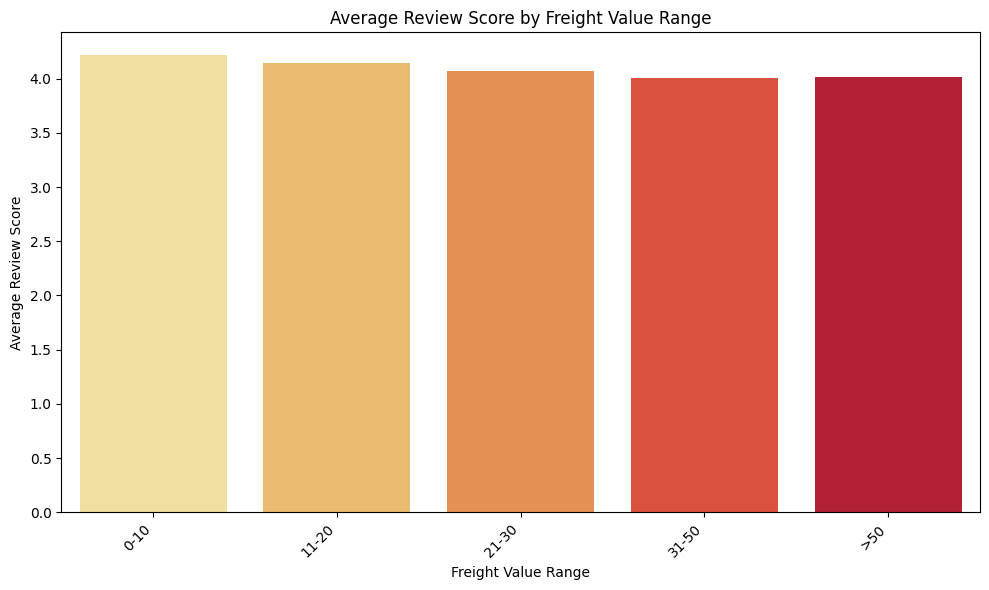

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=average_review_scores_by_price.index,
    y=average_review_scores_by_price.values,
    palette=sns.color_palette("YlGnBu", n_colors=len(average_review_scores_by_price))
)
plt.title('Average Review Score by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=average_review_scores_by_freight.index,
    y=average_review_scores_by_freight.values,
    palette=sns.color_palette("YlOrRd", n_colors=len(average_review_scores_by_freight))
)
plt.title('Average Review Score by Freight Value Range')
plt.xlabel('Freight Value Range')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Hubungan Seller grade, sekker state dan product category dengan rating**

In [19]:
average_review_scores_by_seller_grade = df_cleaned.groupby('seller_grade')['review_score'].mean().sort_values()
# display(average_review_scores_by_seller_grade)

In [20]:
df_cleaned['same_state'] = (df_cleaned['seller_state'] == df_cleaned['customer_state'])

average_delivery_delay_by_state = df_cleaned.groupby('same_state')['delivery_delay_hours'].mean()
average_review_score_by_state = df_cleaned.groupby('same_state')['review_score'].mean()

print("Average Delivery Delay Hours by State Match:")
display(average_delivery_delay_by_state)

Average Delivery Delay Hours by State Match:


same_state
False   -293.088393
True    -234.427813
Name: delivery_delay_hours, dtype: float64

In [21]:
print("\nAverage Review Score by State Match:")
display(average_review_score_by_state)


Average Review Score by State Match:


same_state
False    4.063210
True     4.239047
Name: review_score, dtype: float64

In [22]:
average_review_scores_by_category = df_cleaned.groupby('product_category_name_english')['review_score'].mean().sort_values()
display(average_review_scores_by_category)

product_category_name_english
security_and_services        2.500000
office_furniture             3.618637
fashion_male_clothing        3.765217
home_comfort_2               3.826087
audio                        3.832370
                               ...   
food_drink                   4.456140
books_imported               4.500000
books_general_interest       4.514735
cds_dvds_musicals            4.666667
fashion_childrens_clothes    5.000000
Name: review_score, Length: 71, dtype: float64

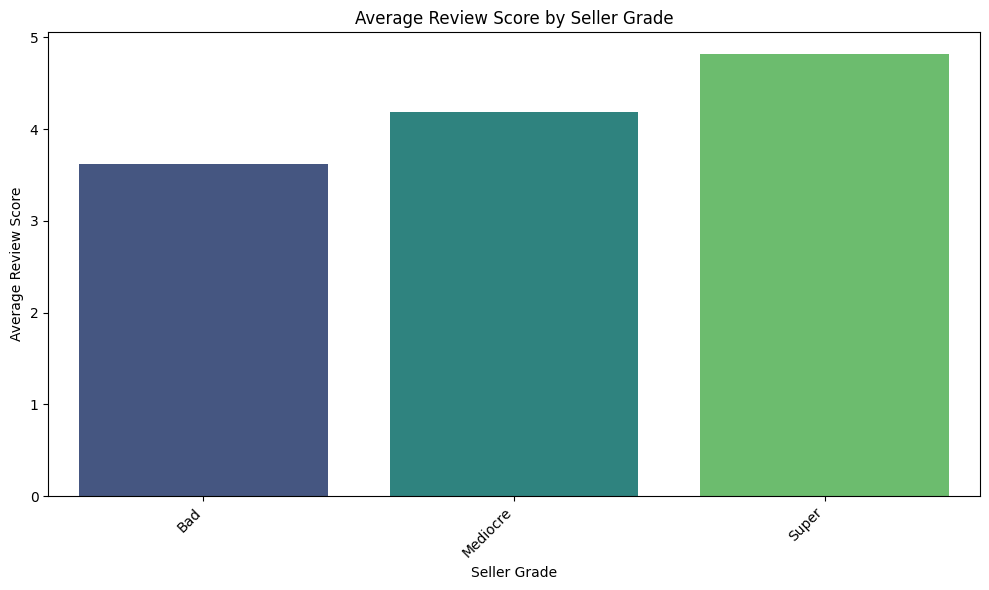

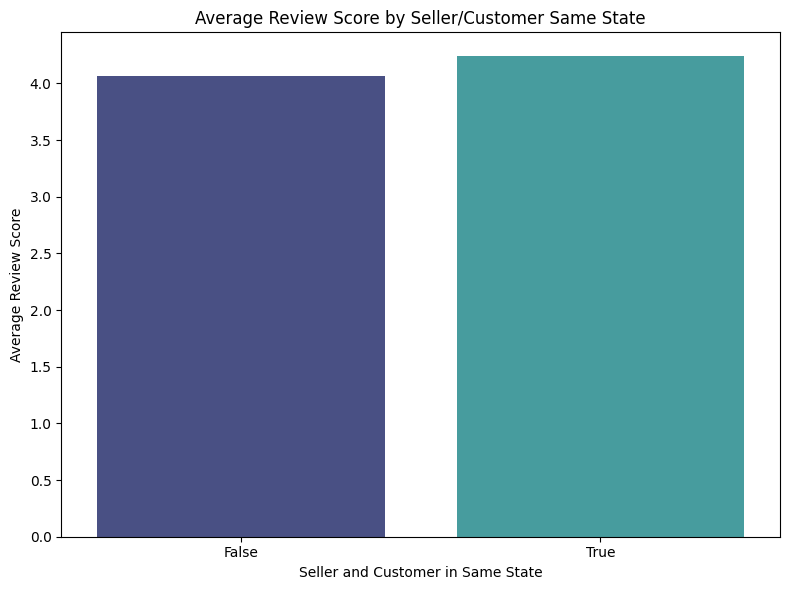

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=average_review_scores_by_seller_grade.index,
    y=average_review_scores_by_seller_grade.values,
    palette="viridis"
)
plt.title('Average Review Score by Seller Grade')
plt.xlabel('Seller Grade')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=average_review_score_by_state.index,
    y=average_review_score_by_state.values,
    palette="mako"
)
plt.title('Average Review Score by Seller/Customer Same State')
plt.xlabel('Seller and Customer in Same State')
plt.ylabel('Average Review Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

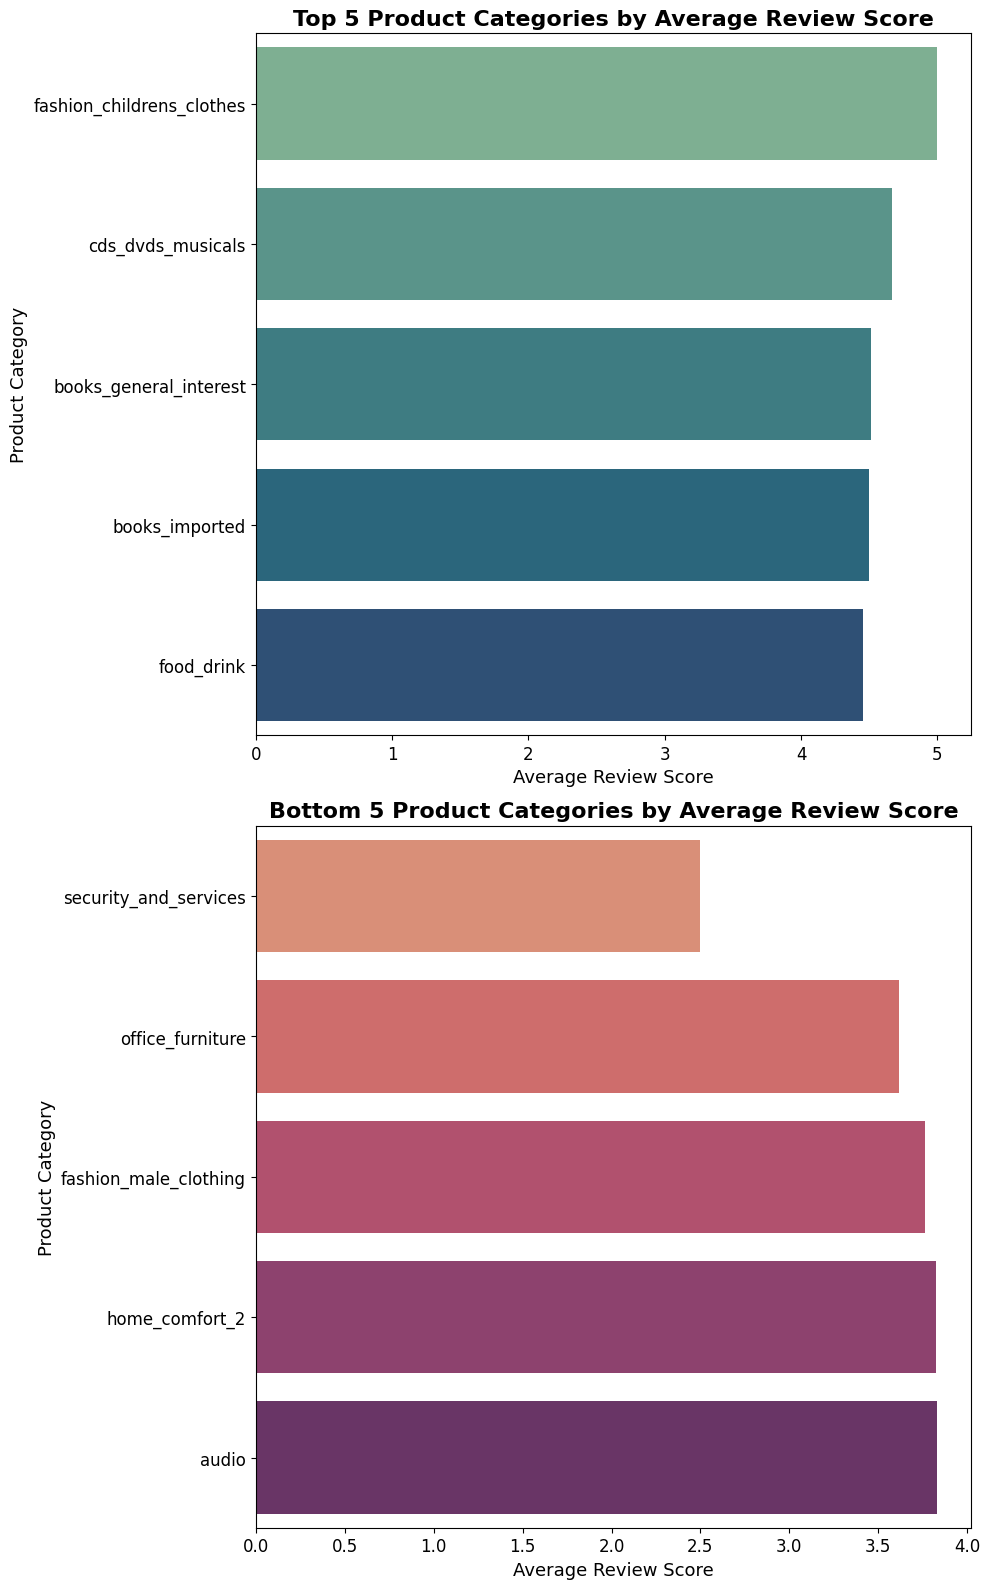

In [24]:
# Use a visually appealing color palette for the barplots
fig, axes = plt.subplots(2, 1, figsize=(10, 16))

# Top 5 (descending order)
top5 = average_review_scores_by_category.sort_values(ascending=False).head(5)
sns.barplot(
    y=top5.index,
    x=top5.values,
    ax=axes[0],
    palette="crest"
)
axes[0].set_title('Top 5 Product Categories by Average Review Score', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Average Review Score', fontsize=13)
axes[0].set_ylabel('Product Category', fontsize=13)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].tick_params(axis='x', labelsize=12)

# Bottom 5 (ascending order)
bottom5 = average_review_scores_by_category.sort_values(ascending=True).head(5)
sns.barplot(
    y=bottom5.index,
    x=bottom5.values,
    ax=axes[1],
    palette="flare"
)
axes[1].set_title('Bottom 5 Product Categories by Average Review Score', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Average Review Score', fontsize=13)
axes[1].set_ylabel('Product Category', fontsize=13)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

### **Korelasi setiap feature dengan rating Score**

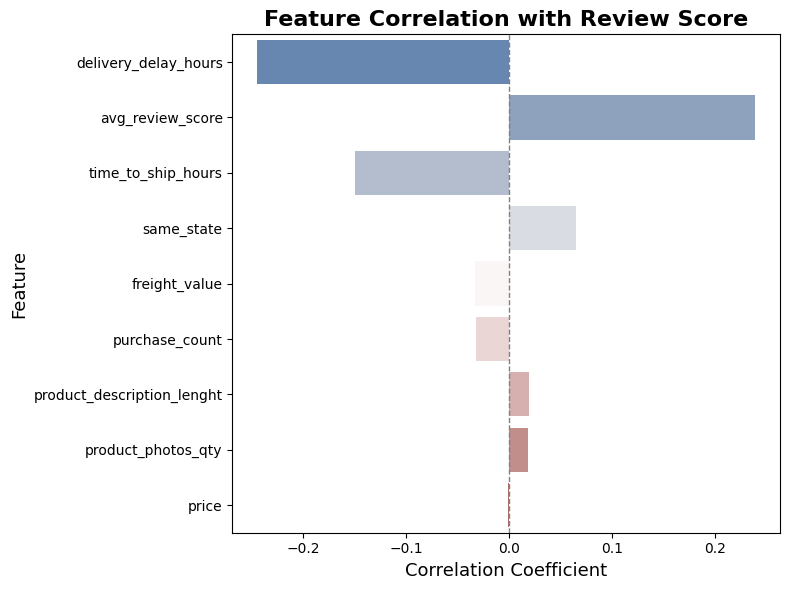

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate correlation matrix for numeric columns
correlation_matrix = df_cleaned.corr(numeric_only=True)

# --- 1. Correlation with Review Score (Barplot) ---
corr_to_review = correlation_matrix['review_score'].drop('review_score').sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    y=corr_to_review.index,
    x=corr_to_review.values,
    palette="vlag"
)
plt.title('Feature Correlation with Review Score', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

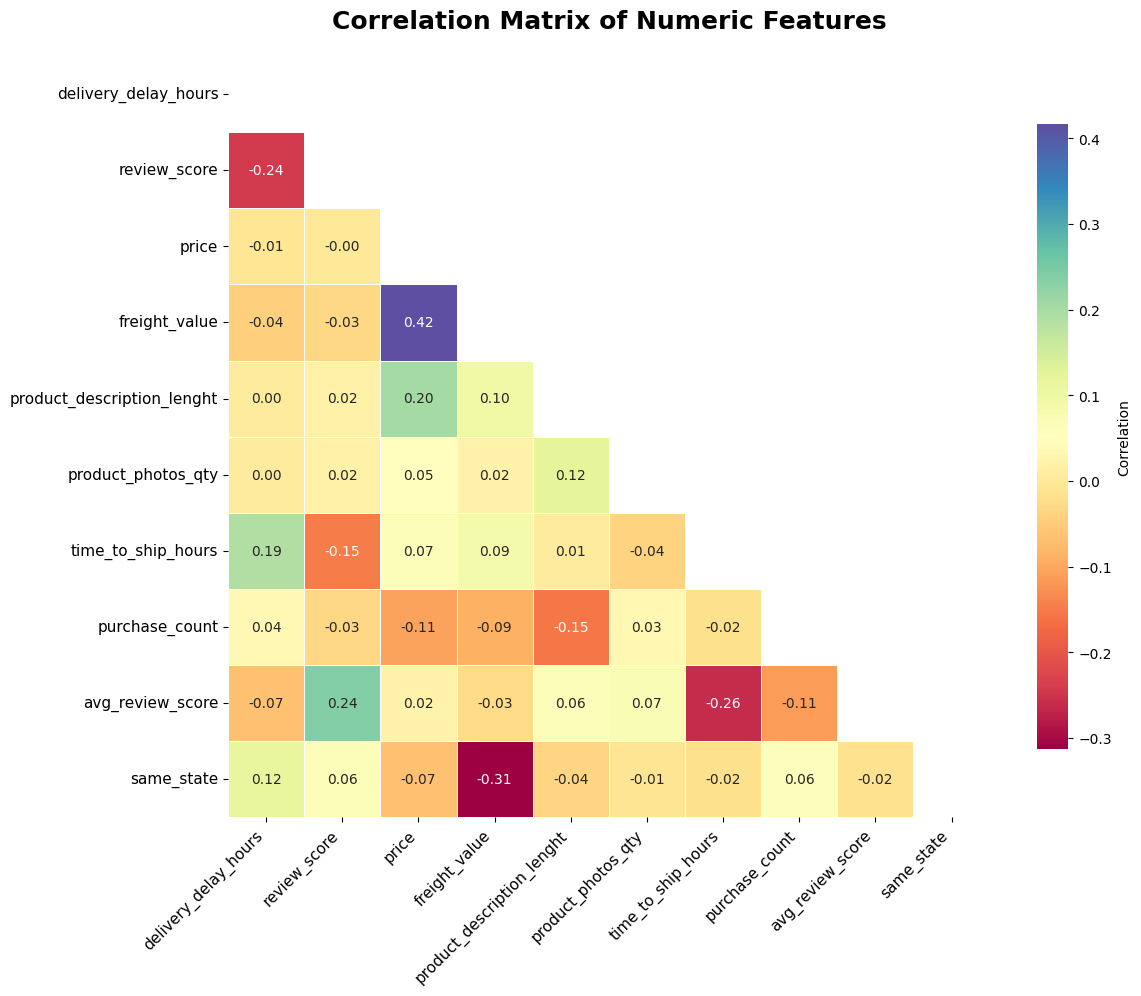

In [26]:

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='Spectral',
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True,
    annot_kws={"size": 10}
)
plt.title('Correlation Matrix of Numeric Features', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

# Preprocessing

In [27]:
df_model = df_cleaned.copy()

# Target: 0 = Bad (<3), 1 = Neutral (3-4), 2 = Good (>4)
def map_review_score(score):
    if score < 3:
        return 0  # Bad
    elif 3 <= score < 4:
        return 1  # Neutral
    else:
        return 2  # Good

df_model['sentiment_score'] = df_model['review_score'].apply(map_review_score)
print(df_model['sentiment_score'].value_counts())

sentiment_score
2    76700
0    13343
1     8251
Name: count, dtype: int64


In [28]:
df_model.columns

Index(['order_id', 'product_id', 'seller_id', 'customer_unique_id',
       'delivery_delay_hours', 'seller_state', 'customer_state',
       'review_score', 'price', 'freight_value', 'seller_grade',
       'product_category_name_english', 'product_description_lenght',
       'product_photos_qty', 'time_to_ship_hours', 'purchase_count',
       'avg_review_score', 'order_purchase_timestamp', 'delivery_delay_range',
       'price_range', 'freight_range', 'same_state', 'sentiment_score'],
      dtype='object')

In [29]:
# Prepare features and target for regression
# Target: avg_review_score (regression)

# Drop columns that should not be used as features
drop_cols = [
    'review_score',         # original review score (if present)
    'avg_review_score',     # target
    'sentiment_score',      # classification target
    'order_id', 'product_id', 'customer_id', 'seller_id', "customer_unique_id",# IDs
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date'
]
# Only drop columns that exist
drop_cols = [col for col in drop_cols if col in df_model.columns]

X = df_model.drop(columns=drop_cols)
y = df_model['avg_review_score']

In [30]:

label_encoders = {}

# Identify categorical columns
categorical_features = ['seller_state', 'customer_state', 'seller_grade', 'product_category_name_english', 
                        'delivery_delay_range', 'price_range', 'freight_range', "same_state"]

# Apply LabelEncoder to each categorical column
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le  # Store the encoder for future use

# Display the transformed dataframe
display(X.head())

,delivery_delay_hours,seller_state,customer_state,price,freight_value,seller_grade,product_category_name_english,product_description_lenght,product_photos_qty,time_to_ship_hours,purchase_count,delivery_delay_range,price_range,freight_range,same_state
0,-170.579722,21,25,29.99,8.72,1,49,268.0,4.0,56.974167,53,0,0,0,1
1,-128.537500,21,4,118.70,22.76,1,59,178.0,1.0,41.823056,110,0,1,2,0
2,-413.891944,21,8,159.90,19.22,1,5,232.0,1.0,5.186389,1124,0,1,1,0
3,-311.521667,7,19,45.00,27.20,1,60,468.0,3.0,90.198056,150,0,0,2,0
4,-221.716111,21,25,19.90,8.72,1,66,316.0,4.0,22.465278,124,0,0,0,1


In [31]:
X.columns

Index(['delivery_delay_hours', 'seller_state', 'customer_state', 'price',
       'freight_value', 'seller_grade', 'product_category_name_english',
       'product_description_lenght', 'product_photos_qty',
       'time_to_ship_hours', 'purchase_count', 'delivery_delay_range',
       'price_range', 'freight_range', 'same_state'],
      dtype='object')

# MACHINE LEARNING

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import joblib

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Helper function for evaluation
def eval_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    return {'mae': mae, 'rmse': rmse, 'r2': r2}

# Dictionary to hold results
results = {}

# 1. Linear Regression
print('--- Linear Regression ---')
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
results['LinearRegression'] = eval_regression(lr, X_test_scaled, y_test)

# 2. XGBoost Regressor
print('\n--- XGBoost Regressor ---')
if device == 'cuda':
    xgb = XGBRegressor(n_estimators=500, tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)
else:
    xgb = XGBRegressor(n_estimators=500, random_state=42)
xgb.fit(X_train_scaled, y_train)
results['XGBoost'] = eval_regression(xgb, X_test_scaled, y_test)

# 3.. Decision Tree Regressor
print('\n--- Decision Tree Regressor ---')
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
results['DecisionTree'] = eval_regression(dt, X_test_scaled, y_test)

# 4. Random Forest Regressor
print('\n--- Random Forest Regressor ---')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
results['RandomForest'] = eval_regression(rf, X_test_scaled, y_test)


Using device: cpu
--- Linear Regression ---
MAE: 0.1635
RMSE: 0.2254
R2 Score: 0.6105

--- XGBoost Regressor ---
MAE: 0.0444
RMSE: 0.1068
R2 Score: 0.9126

--- Decision Tree Regressor ---
MAE: 0.0289
RMSE: 0.1345
R2 Score: 0.8612

--- Random Forest Regressor ---
MAE: 0.0295
RMSE: 0.0965
R2 Score: 0.9285


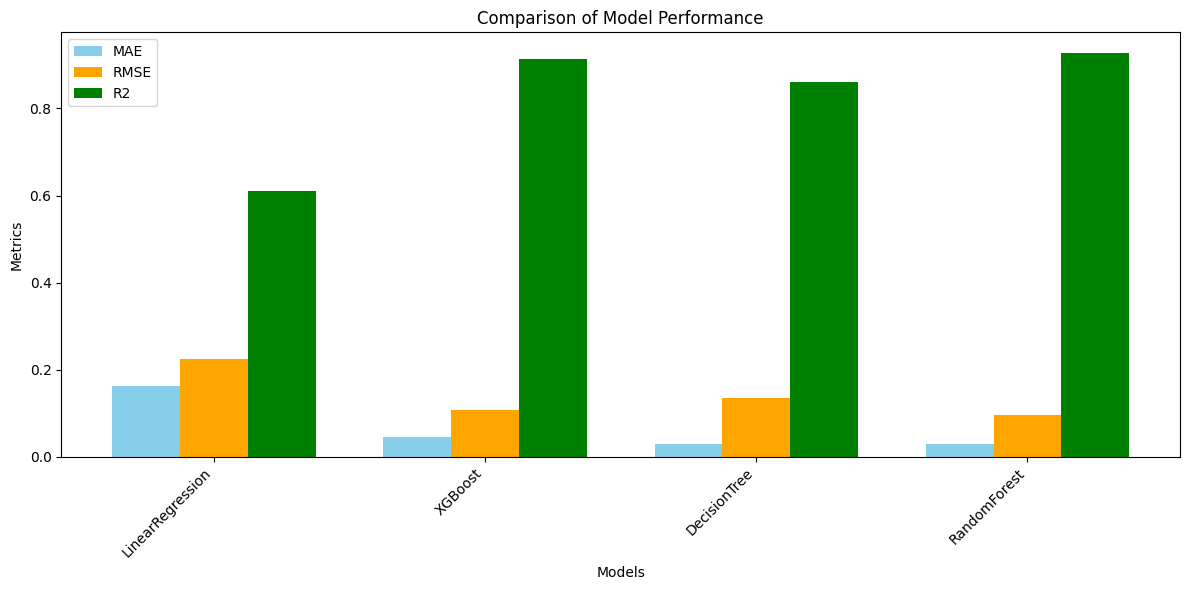

In [35]:
import matplotlib.pyplot as plt

# Extract model names and metrics
model_names = list(results.keys())
mae_values = [results[model]['mae'] for model in model_names]
rmse_values = [results[model]['rmse'] for model in model_names]
r2_values = [results[model]['r2'] for model in model_names]

# Create a bar plot for MAE, RMSE, and R2
x = range(len(model_names))
width = 0.25

plt.figure(figsize=(12, 6))

# Plot MAE
plt.bar(x, mae_values, width=width, label='MAE', color='skyblue')

# Plot RMSE
plt.bar([i + width for i in x], rmse_values, width=width, label='RMSE', color='orange')

# Plot R2
plt.bar([i + 2 * width for i in x], r2_values, width=width, label='R2', color='green')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Comparison of Model Performance')
plt.xticks([i + width for i in x], model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Save the best model based on R2 score
best_model_name = max(results, key=lambda model: results[model]['r2'])
print(f"Best model based on R2 score: {best_model_name}")

# Get the best model object
if best_model_name == 'LinearRegression':
    best_model = lr
elif best_model_name == 'XGBoost':
    best_model = xgb
elif best_model_name == 'RandomForest':
        best_model = rf
elif best_model_name == 'DecisionTree':
    best_model = dt
else:
    raise ValueError(f"Unknown model name: {best_model_name}")


joblib.dump(best_model, f"model/best_model_{best_model_name}.pkl")
print(f"Best model saved as best_model_{best_model_name}.pkl")

Best model based on R2 score: RandomForest
Best model saved as best_model_RandomForest.pkl


In [ ]:
# Save LabelEncoders
for feature, encoder in label_encoders.items():
    joblib.dump(encoder, f"model/label_encoder_{feature}.pkl")
    print(f"LabelEncoder for {feature} saved as label_encoder_{feature}.pkl")

# Save MinMaxScaler
joblib.dump(scaler, "model/minmax_scaler.pkl")
print("MinMaxScaler saved as minmax_scaler.pkl")

LabelEncoder for seller_state saved as label_encoder_seller_state.pkl
LabelEncoder for customer_state saved as label_encoder_customer_state.pkl
LabelEncoder for seller_grade saved as label_encoder_seller_grade.pkl
LabelEncoder for product_category_name_english saved as label_encoder_product_category_name_english.pkl
LabelEncoder for delivery_delay_range saved as label_encoder_delivery_delay_range.pkl
LabelEncoder for price_range saved as label_encoder_price_range.pkl
LabelEncoder for freight_range saved as label_encoder_freight_range.pkl
LabelEncoder for same_state saved as label_encoder_same_state.pkl
MinMaxScaler saved as minmax_scaler.pkl


In [ ]:
import shap

# SHAP Feature Importance
explainer = shap.Explainer(best_model, X_train_scaled)
shap_values = explainer(X_train_scaled)

# Summary plot
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

 54%|===========         | 42603/78635 [27:54<23:35]       